Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [5]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [6]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [13]:
from sklearn.preprocessing import PolynomialFeatures
phi = PolynomialFeatures(1).fit_transform(X)
print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [15]:
from numpy import linalg
phi_transposed = phi.transpose()
print(phi_transposed)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi_transposed, phi)), phi_transposed), y)
print(w)
w = np.matmul(np.linalg.pinv(phi), y)
print(w)

[[1. 1. 1. 1.]
 [0. 1. 2. 4.]]
[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [16]:
from sklearn.metrics import mean_squared_error
h_x = []
for i in phi:
    h_x.append(np.matmul(w.transpose(), i))

E_hD = 0
for i in range(0, y.size) :
    E_hD += np.power(y[i] - h_x[i], 2)
E_hD /= 2

E_hD_2 = sklearn.metrics.mean_squared_error(y, h_x)
print(y)
print(phi_transposed[0])
print(E_hD)
print(E_hD_2)

[4 1 2 5]
[1. 1. 1. 1.]
4.085714285714286
2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [21]:
print(phi)
w = np.matmul(np.linalg.inv(phi), y)
print(w)

phi = PolynomialFeatures(3).fit_transform(X)
w = np.matmul(np.linalg.inv(phi), y)
print(w)

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]
[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [25]:
from sklearn.linear_model import LinearRegression
w = LinearRegression().fit(X, y)
print(w.coef_)
print(w.intercept_)

print(mean_squared_error(w.predict(X), y))

[0.45714286]
2.2
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [26]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    y = []
    for x_i in X :
        y.append(f(x_i) + np.random.normal(0, noise))
    return y

In [27]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [30]:
def f(x):
    return 5 + x - 2*pow(x, 2) - 5*pow(x, 3)

X = make_instances(-5, 5, 50)
# f = np.array([5, 1, -2, -5])
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

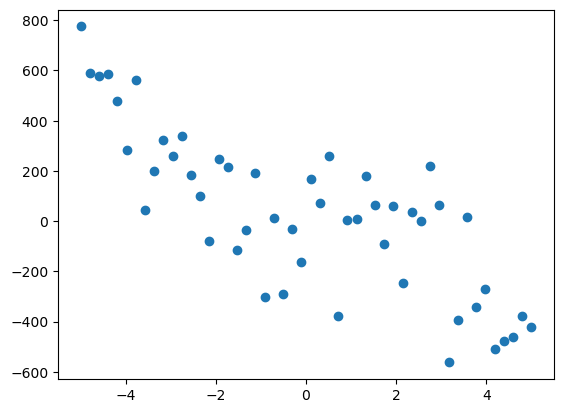

In [31]:
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

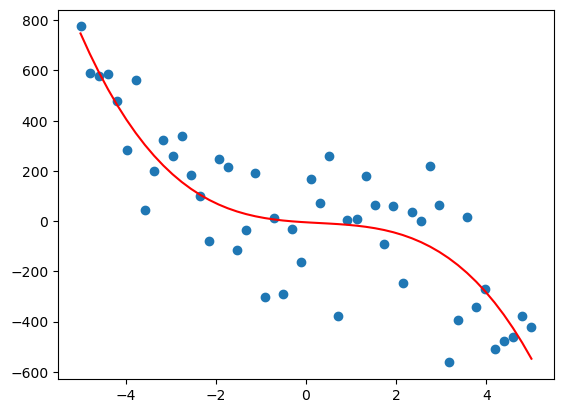

In [33]:
phi = PolynomialFeatures(3).fit_transform(X)
w = np.matmul(np.linalg.pinv(phi), y)
h_x = np.matmul(w.transpose(), phi.transpose())

plt.scatter(X, y)
plt.plot(X, h_x.transpose(), 'r')

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

38150.45599536321
28034.137176466807
27101.876794930802
25370.962184973032
21055.911118187407


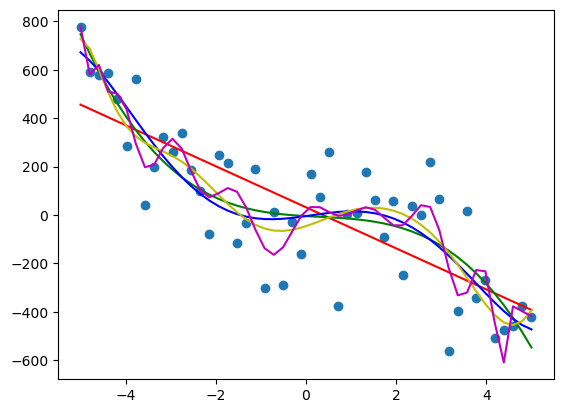

In [59]:
d = [1, 3, 5, 10, 20]
colour = ['r', 'g', 'b', 'y', 'm']

plt.scatter(X, y)

for i in range(0, len(d)):
    phi = PolynomialFeatures(d[i]).fit_transform(X)
    w = np.matmul(np.linalg.pinv(phi), y)
    h_x = np.matmul(w.transpose(), phi.transpose())
    
    print(sklearn.metrics.mean_squared_error(y, h_x.transpose()))
    plt.plot(X, h_x.transpose(), colour[i])

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

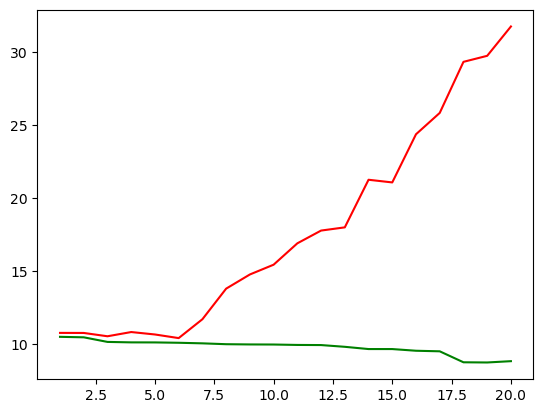

In [72]:
from sklearn.model_selection import train_test_split
ms_error_train = []
ms_error_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)
for i in range(1, 21) :
    phi_train = PolynomialFeatures(i).fit_transform(X_train)
    w = np.matmul(np.linalg.pinv(phi_train), y_train)
    h = np.matmul(w.transpose(), phi_train.transpose())
    ms_error_train.append(np.log(mean_squared_error(y_train, h.transpose())))

    phi_test = PolynomialFeatures(i).fit_transform(X_test)
    h = np.matmul(w.transpose(), phi_test.transpose())
    ms_error_test.append(np.log(mean_squared_error(y_test, h.transpose())))

plt.plot(range(1, 21), ms_error_train, 'g')
plt.plot(range(1, 21), ms_error_test, 'r')

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

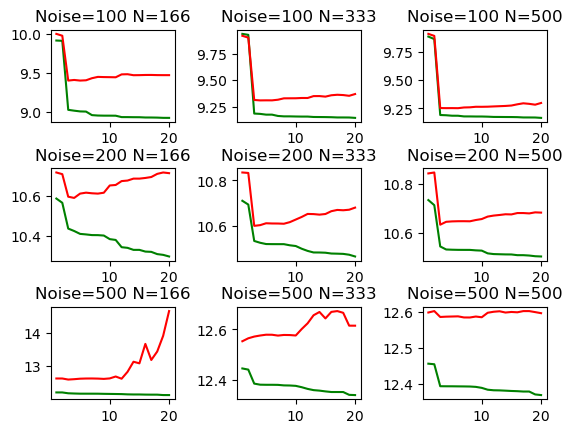

In [89]:
noise = [100, 200, 500]
size = [166, 333, 500]

X = make_instances(-5, 5, 1000)
fig, axis = plt.subplots(3, 3)

for i in range(0, 3) :
    y = make_labels(X, f, noise[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

    for j in range(0, 3) :
        X_train_0 = X_train[:size[j]]
        X_test_0 = X_test[:size[j]]
        y_train_0 = y_train[:size[j]]
        y_test_0 = y_test[:size[j]]

        ms_error_train = []
        ms_error_test = []

        for k in range(1, 21):
            phi_train = PolynomialFeatures(k).fit_transform(X_train_0)
            w = np.matmul(np.linalg.pinv(phi_train), y_train_0)
            h = np.matmul(w.transpose(), phi_train.transpose())
            ms_error_train.append(np.log(mean_squared_error(y_train_0, h.transpose())))

            phi_test = PolynomialFeatures(k).fit_transform(X_test_0)
            h = np.matmul(w.transpose(), phi_test.transpose())
            ms_error_test.append(np.log(mean_squared_error(y_test_0, h.transpose())))

        axis[i, j].plot(range(1, 21), ms_error_train, 'g')
        axis[i, j].plot(range(1, 21), ms_error_test, 'r')
        axis[i, j].set_title("Noise=" + str(noise[i]) + " N=" + str(size[j]))

plt.subplots_adjust(wspace=0.5, hspace=0.5)

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [83]:
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

lambdas = [0, 1, 10]

for i in range(0, 3) :
    phi = PolynomialFeatures(3).fit_transform(X)

    identity_lambda = lambdas[i] * np.identity(len(phi))
    matrix_0 = np.matmul(phi.transpose(), phi) + identity_lambda

    w = np.matmul(np.matmul(np.linalg.matrix_power(matrix_0, -1), phi.transpose()), y)
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [84]:
from sklearn.linear_model import Ridge
for i in range(0, 3) :
    print(Ridge(lambdas[i]).fit(phi, y).coef_)
    print(Ridge(lambdas[i]).fit(phi, y).intercept_)

[ 0.         -5.91666667  3.375      -0.45833333]
3.999999999999943
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471643
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229733


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

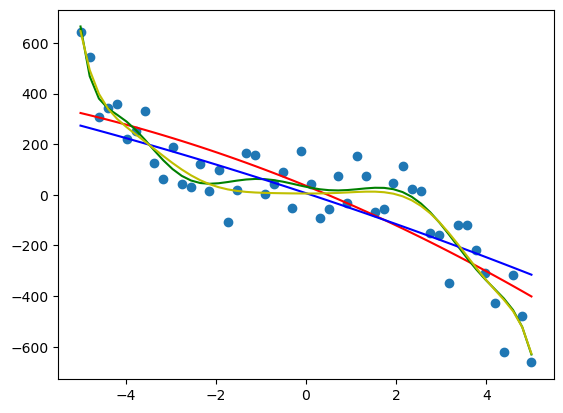

In [93]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 100)

lambdas = [0, 100]
d = [2, 10]
colour = ['r', 'g', 'b', 'y']
colour_i = 0

for i in range(0, len(lambdas)) :
    for j in range(0, len(d)) :
        phi = PolynomialFeatures(d[j]).fit_transform(X)
        identity_lambda = lambdas[i] * np.identity(len(phi[0]))
        matrix_0 = np.matmul(phi.transpose(), phi) + identity_lambda

        w = np.matmul(np.matmul(np.linalg.matrix_power(matrix_0, -1), phi.transpose()), y)
        h = np.matmul(w.transpose(), phi.transpose())

        plt.plot(X, h.transpose(), colour[colour_i])
        colour_i += 1

plt.scatter(X, y)

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


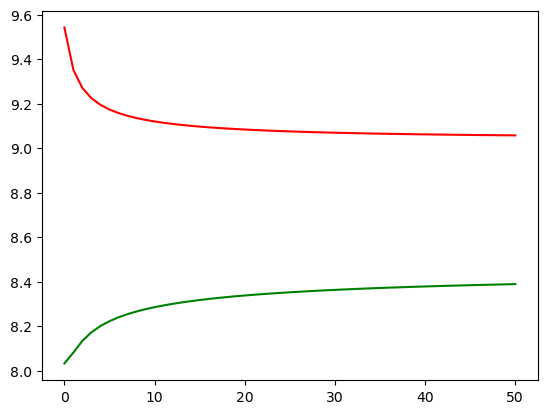

In [96]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

lambdas = [i for i in range(0, 51)]
d = 10
ms_error_train = []
ms_error_test = []

for i in range(0, len(lambdas)):
    phi_train = PolynomialFeatures(d).fit_transform(X_train)
    identity_lambda = lambdas[i] * np.identity(len(phi_train[0]))

    matrix_0 = np.matmul(phi_train.transpose(), phi_train) + identity_lambda
    w = np.matmul(np.matmul(np.linalg.matrix_power(matrix_0, -1), phi_train.transpose()), y_train)

    h = np.matmul(w.transpose(), phi_train.transpose())
    ms_error_train.append(np.log(mean_squared_error(y_train, h.transpose())))

    phi_test = PolynomialFeatures(d).fit_transform(X_test)
    h = np.matmul(w.transpose(), phi_test.transpose())
    ms_error_test.append(np.log(mean_squared_error(y_test, h.transpose())))

plt.plot(range(0, 51), ms_error_train, 'g')
plt.plot(range(0, 51), ms_error_test, 'r')

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [97]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

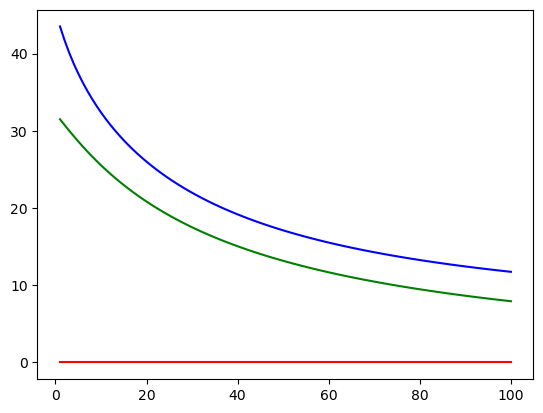

In [98]:
from sklearn.linear_model import Ridge
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

d = 5
lambdas = [i for i in range(1, 101)]
L0 = []
L1 = []
L2 = []

phi_train = PolynomialFeatures(d).fit_transform(X_train)

for i in range(0, len(lambdas)) :
    ridge = Ridge(lambdas[i])
    ridge_fit = ridge.fit(phi_train, y_train)

    L0.append(nonzeroes(ridge_fit.coef_))
    L1.append(np.linalg.norm(ridge_fit.coef_, 1))
    L2.append(np.linalg.norm(ridge_fit.coef_, 2))

plt.plot(range(1, 101), L0, 'r')
plt.plot(range(1, 101), L1, 'g')
plt.plot(range(1, 101), L2, 'b')

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

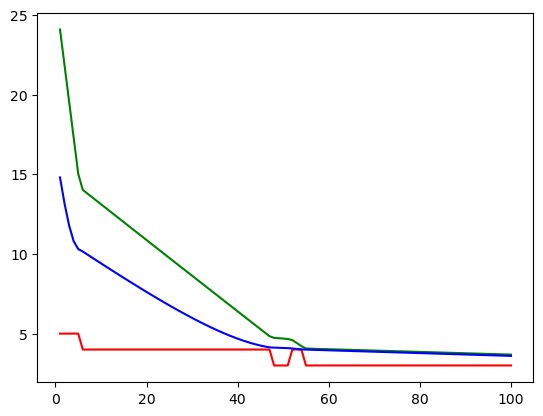

In [104]:
from sklearn.linear_model import Lasso
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

d = 5
lambdas = [i for i in range(1, 101)]
L0 = []
L1 = []
L2 = []

phi_train = PolynomialFeatures(d).fit_transform(X_train)

for i in range(0, len(lambdas)):
    lasso = Lasso(lambdas[i])
    lasso_fit = lasso.fit(phi_train, y_train)

    L0.append(nonzeroes(lasso_fit.coef_))
    L1.append(np.linalg.norm(lasso_fit.coef_, 1))
    L2.append(np.linalg.norm(lasso_fit.coef_, 2))

plt.plot(range(1, 101), L0, 'r')
plt.plot(range(1, 101), L1, 'g')
plt.plot(range(1, 101), L2, 'b')

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [105]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

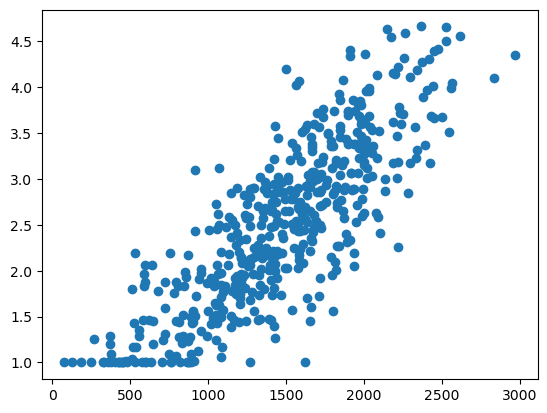

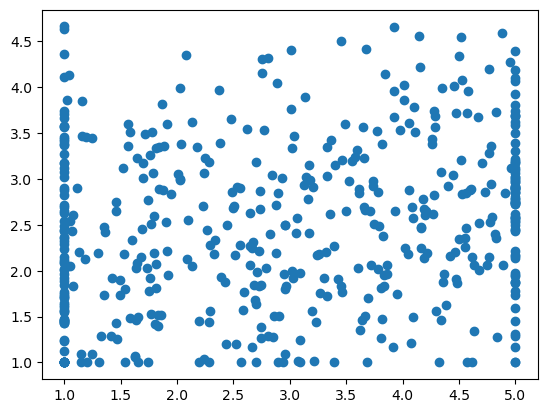

In [110]:
plt.scatter(exam_score, grades_y)
plt.show()
plt.scatter(grade_in_highschool, grades_y)
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [117]:
ridge = Ridge(0.01)
ridge_fit = ridge.fit(grades_X, grades_y)

print(ridge_fit.coef_)

[[0.00141497 0.09477276]]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(grades_X)
grades_X_fixed = scaler.transform(grades_X)

grades_y = grades_y.reshape(-1, 1)
scaler.fit(grades_y)
grades_y_fixed = scaler.transform(grades_y)

ridge = Ridge(0.01)
ridge_fit = ridge.fit(grades_X_fixed, grades_y_fixed)

print(ridge_fit.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [121]:
column = grades_X_fixed[:, 1].reshape(-1, 1)
grades_X_fixed_colinear = np.append(grades_X_fixed, column, 1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [122]:
ridge0 = Ridge(0.01)
ridge_fit0 = ridge0.fit(grades_X_fixed_colinear, grades_y_fixed)
print(ridge_fit.coef_)
print(ridge_fit.intercept_)
print(ridge_fit0.coef_)
print(ridge_fit0.intercept_)

[[0.81630375 0.15167761]]
[8.62551331e-17]
[[0.81630364 0.07583957 0.07583957]]
[8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [124]:
deviation_001_0 = []
deviation_001_1 = []
deviation_001_2 = []

deviation_1000_0 = []
deviation_1000_1 = []
deviation_1000_2 = []

for i in range(0, 10) :
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5, train_size=0.5)
    ridge_001 = Ridge(0.01)
    ridge_001_fit = ridge_001.fit(X_train, y_train)
    #print(ridge_001_fit.coef_)
    #print(np.std(ridge_001_fit.coef_))
    deviation_001_0.append(ridge_001_fit.coef_[0][0])
    deviation_001_1.append(ridge_001_fit.coef_[0][1])
    deviation_001_2.append(ridge_001_fit.coef_[0][2])

    ridge_1000 = Ridge(1000)
    ridge_1000_fit = ridge_1000.fit(X_train, y_train)
    #print(ridge_1000_fit.coef_)
    #print(np.std(ridge_1000_fit.coef_))
    deviation_1000_0.append(ridge_1000_fit.coef_[0][0])
    deviation_1000_1.append(ridge_1000_fit.coef_[0][1])
    deviation_1000_2.append(ridge_1000_fit.coef_[0][2])

print(np.std(deviation_001_0))
print(np.std(deviation_001_1))
print(np.std(deviation_001_2))

print(np.std(deviation_1000_0))
print(np.std(deviation_1000_1))
print(np.std(deviation_1000_2))

0.021221749044134326
0.015126366700991776
0.015126366700960892
0.006750128762009666
0.004701529115310344
0.004701529115310348


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.